In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report, roc_curve, auc


In [9]:
path = "email.csv"
df = pd.read_csv(path)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5573, 2)

In [6]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [7]:
df.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(415)

In [13]:
df.drop_duplicates(inplace=True)

In [15]:
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [16]:
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


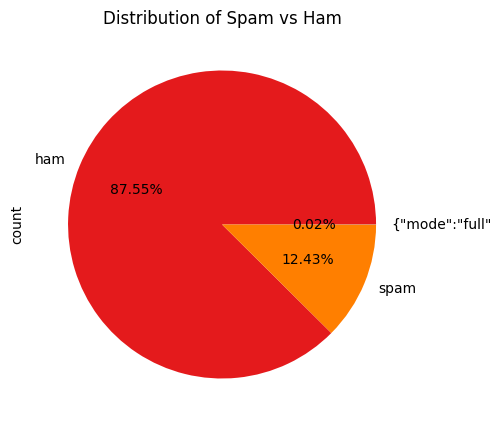

In [50]:
spread = df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f"Distribution of Spam vs Ham")
plt.show()

In [ ]:
X = df["Message"]
y = df["Spam"]

vectorizer = TfidfVectorizer(stop_words="english")
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42, stratify=y
)

model = ComplementNB()
model.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None
,norm,False


In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.92      0.95       904
           1       0.62      0.94      0.75       128

    accuracy                           0.92      1032
   macro avg       0.81      0.93      0.85      1032
weighted avg       0.95      0.92      0.93      1032



In [38]:
print("Accuracy Score is :", accuracy_score(y_test, y_pred))

Accuracy Score is : 0.9224806201550387


[[832  72]
 [  8 120]]


Text(0.5, 1.0, 'Confusion Matrix')

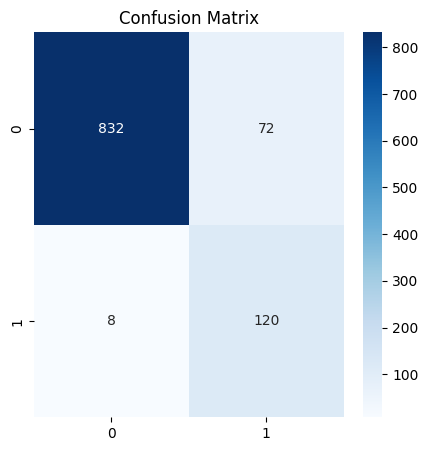

In [51]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")


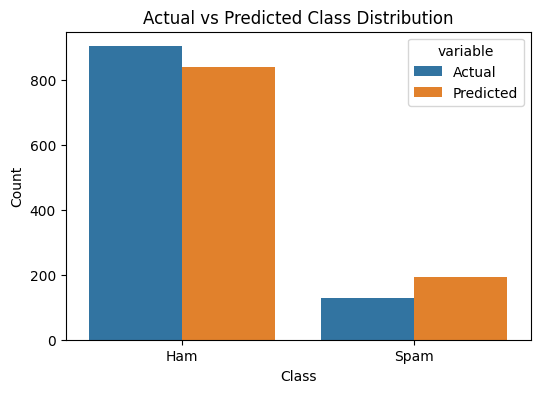

In [ ]:
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

plt.figure(figsize=(6,4))
sns.countplot(data=results.melt(), x="value", hue="variable")
plt.xticks([0, 1], ["Ham", "Spam"])
plt.title("Actual vs Predicted Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


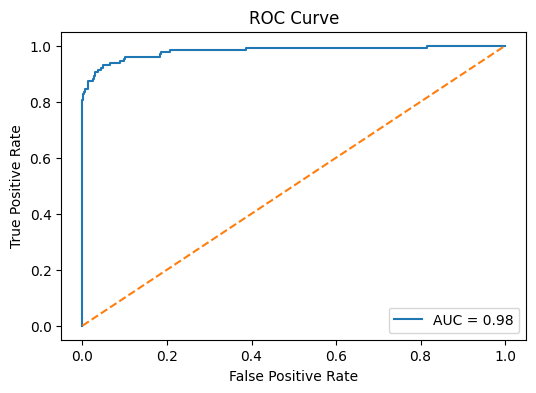

In [47]:
y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
